In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict
from scipy.stats.mstats import gmean

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline



# Import Puget Sound data and create dataframe

In [339]:
df=pd.read_excel('/ocean/ksuchy/MOAD/observe/SSMSP_TransBoundary_Extract_2014-2019_Verticals_Keister_Lab.xlsx',engine='openpyxl',sheet_name='SSMSP 2014-2019 Density&Biomass')

In [340]:
df

,BugSampleID,Project,Sample Code,Sampling Group,Station,Site Name,Basin,Sub Basin,Latitude,Longitude,...,Ind Carbon (ug),Density (#/m3),Final Carbon (mg/m3),Species Size Category Aggregation,Size Category Aggregation,Collection Confidence,Carbon Regression EQ,C to DW multipier,DW Regression Equation,C/DW Source
0,93945,SSMSP,060817HCB004V1454,HCSEG,HCB004V,Sisters Point,Hood Canal,S Hood Canal,47.35620,-123.0249,...,122.333000,5.169013,3.185477,Amphipod,Amphipod,High,C(ug)=(0.0049*([Length(mm)])^2.957)*1000)*37%,C = DW * 37%,DW(ug)=0.0049*([Length(mm)])^2.957)*1000,"Ikeda & Shiga, 1999"
1,93946,SSMSP,060817HCB004V1454,HCSEG,HCB004V,Sisters Point,Hood Canal,S Hood Canal,47.35620,-123.0249,...,107.303200,0.068013,0.010533,Amphipod,Amphipod,High,C(ug)=(0.0049*([Length(mm)])^2.957)*1000)*37%,C = DW * 37%,DW(ug)=0.0049*([Length(mm)])^2.957)*1000,"Ikeda & Shiga, 1999"
2,93962,SSMSP,060817HCB004V1454,HCSEG,HCB004V,Sisters Point,Hood Canal,S Hood Canal,47.35620,-123.0249,...,17.764660,21.764267,0.397324,Amphipod,Amphipod,High,C(ug)=(0.0049*([Length(mm)])^2.957)*1000)*37%,C = DW * 37%,DW(ug)=0.0049*([Length(mm)])^2.957)*1000,"Ikeda & Shiga, 1999"
3,94018,SSMSP,030917HCB003V1218,HCSEG,HCB003V,Eldon,Hood Canal,S Hood Canal,47.53787,-123.0096,...,343.152100,1.730036,0.564992,Amphipod,Amphipod,High,C(ug)=((0.02 * [Length (mm)]^2.1)*1000)*37%,C = DW * 37%,DW(μg) = (0.02 * [Length(mm)]^2.1)*1000,"Kafanov & Fedotov, 1982"
4,94030,SSMSP,030917HCB003V1218,HCSEG,HCB003V,Eldon,Hood Canal,S Hood Canal,47.53787,-123.0096,...,17.764660,0.812593,0.090677,Amphipod,Amphipod,High,C(ug)=(0.0049*([Length(mm)])^2.957)*1000)*37%,C = DW * 37%,DW(ug)=0.0049*([Length(mm)])^2.957)*1000,"Ikeda & Shiga, 1999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81582,31509,SSMSP,050615MUKV1200,TUL,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,...,7.450710,98.804469,0.252324,Unknown Egg,Unknown Egg,Moderate,C (ug) = 8.0935*[Length (mm)]-1.0883,C (ug) = 8.0935*[Length (mm)]-1.0883,NONE,"Keister Lab estimate, 2016"
81583,38434,SSMSP,081315MUKV1121,TUL,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,...,7.450710,8.634707,0.011568,Unknown Egg,Unknown Egg,Moderate,C (ug) = 8.0935*[Length (mm)]-1.0883,C (ug) = 8.0935*[Length (mm)]-1.0883,NONE,"Keister Lab estimate, 2016"
81584,38675,SSMSP,082615MUKV1116,TUL,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,...,2.868051,27.045302,0.077567,Unknown Egg,Unknown Egg,Moderate,C (ug) = 8.0935*[Length (mm)]-1.0883,C (ug) = 8.0935*[Length (mm)]-1.0883,NONE,"Keister Lab estimate, 2016"
81585,39535,SSMSP,050615CAMV1305,TUL,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,...,7.450710,43.628610,0.325064,Unknown Egg,Unknown Egg,Moderate,C (ug) = 8.0935*[Length (mm)]-1.0883,C (ug) = 8.0935*[Length (mm)]-1.0883,NONE,"Keister Lab estimate, 2016"


In [341]:
df.keys()

Index(['BugSampleID', 'Project', 'Sample Code', 'Sampling Group', 'Station',
       'Site Name', 'Basin', 'Sub Basin', 'Latitude', 'Longitude',
       'Date Category', 'Sample Date', 'Sample Year', 'Sample Month',
       'Sample Time', 'Tow Type', 'Mesh Size', 'Diameter (cm)',
       'Station Depth (m)', 'Max Tow Depth (m)', 'Min Tow Depth (m)',
       'Vol Filtered (m3)', 'Broad Group', 'Mid-Level Group', '1st Word Taxa',
       'Genus species', 'Life History Stage', 'Total Ct', 'Ind Carbon (ug)',
       'Density (#/m3)', 'Final Carbon (mg/m3)',
       'Species Size Category Aggregation', 'Size Category Aggregation',
       'Collection Confidence', 'Carbon Regression EQ', 'C to DW multipier',
       'DW Regression Equation', 'C/DW Source'],
      dtype='object')

In [342]:
df.drop(labels=['BugSampleID','Project','Sampling Group','Date Category','Tow Type','Species Size Category Aggregation','Collection Confidence','Carbon Regression EQ','C to DW multipier','DW Regression Equation','C/DW Source'
                       ],axis=1,inplace=True)

In [343]:
df

,Sample Code,Station,Site Name,Basin,Sub Basin,Latitude,Longitude,Sample Date,Sample Year,Sample Month,...,Broad Group,Mid-Level Group,1st Word Taxa,Genus species,Life History Stage,Total Ct,Ind Carbon (ug),Density (#/m3),Final Carbon (mg/m3),Size Category Aggregation
0,060817HCB004V1454,HCB004V,Sisters Point,Hood Canal,S Hood Canal,47.35620,-123.0249,2017-06-08,2017,JUN,...,Amphipod,Amphipoda-Hyperiidea,HYPEROCHE,HYPEROCHE,Unknown,76.0,122.333000,5.169013,3.185477,Amphipod
1,060817HCB004V1454,HCB004V,Sisters Point,Hood Canal,S Hood Canal,47.35620,-123.0249,2017-06-08,2017,JUN,...,Amphipod,Amphipoda-Hyperiidea,HYPERIA,HYPERIA,Unknown,1.0,107.303200,0.068013,0.010533,Amphipod
2,060817HCB004V1454,HCB004V,Sisters Point,Hood Canal,S Hood Canal,47.35620,-123.0249,2017-06-08,2017,JUN,...,Amphipod,Amphipoda-Hyperiidea,THEMISTO,THEMISTO PACIFICA,Unknown,320.0,17.764660,21.764267,0.397324,Amphipod
3,030917HCB003V1218,HCB003V,Eldon,Hood Canal,S Hood Canal,47.53787,-123.0096,2017-03-09,2017,MAR,...,Amphipod,Amphipoda-Cyphocarididae,CYPHOCARIS,CYPHOCARIS CHALLENGERI,Unknown,66.0,343.152100,1.730036,0.564992,Amphipod
4,030917HCB003V1218,HCB003V,Eldon,Hood Canal,S Hood Canal,47.53787,-123.0096,2017-03-09,2017,MAR,...,Amphipod,Amphipoda-Hyperiidea,THEMISTO,THEMISTO PACIFICA,Unknown,31.0,17.764660,0.812593,0.090677,Amphipod
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81582,050615MUKV1200,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-05-06,2015,MAY,...,Unknown Egg,Unknown,UNKNOWN,UNKNOWN,EGG Lg,4500.0,7.450710,98.804469,0.252324,Unknown Egg
81583,081315MUKV1121,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-08-13,2015,AUG,...,Unknown Egg,Unknown,UNKNOWN,UNKNOWN,EGG Lg,385.0,7.450710,8.634707,0.011568,Unknown Egg
81584,082615MUKV1116,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-08-26,2015,SEP,...,Unknown Egg,Unknown,UNKNOWN,UNKNOWN,EGG Med,1000.0,2.868051,27.045302,0.077567,Unknown Egg
81585,050615CAMV1305,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2015-05-06,2015,MAY,...,Unknown Egg,Unknown,UNKNOWN,UNKNOWN,EGG Lg,2025.0,7.450710,43.628610,0.325064,Unknown Egg


In [205]:
df.keys()

Index(['Sample Code', 'Station', 'Site Name', 'Basin', 'Sub Basin', 'Latitude',
       'Longitude', 'Sample Date', 'Sample Year', 'Sample Month',
       'Sample Time', 'Mesh Size', 'Diameter (cm)', 'Station Depth (m)',
       'Max Tow Depth (m)', 'Min Tow Depth (m)', 'Vol Filtered (m3)',
       'Broad Group', 'Mid-Level Group', '1st Word Taxa', 'Genus species',
       'Life History Stage', 'Total Ct', 'Ind Carbon (ug)', 'Density (#/m3)',
       'Final Carbon (mg/m3)', 'Size Category Aggregation'],
      dtype='object')

In [206]:
df['Broad Group'].unique()

array(['Amphipod', 'Amphipod Egg', 'Anthozoan', 'Arachnida', 'Barnacles',
       'Bivalve', 'Bryozoan', 'Cephalopod', 'Chaetognath',
       'Chaetognath Egg', 'Cladocera', 'Copepod', 'Copepod Egg',
       'Copepod Nauplius', 'Crabs', 'Ctenophore', 'Cumacea',
       'Dinoflagellate', 'Echinoderm', 'Fish', 'Fish Egg', 'Gastropod',
       'Hydrozoan', 'Insect', 'Isopod', 'Krill Egg', 'Krill Nauplius',
       'Krill-Adult Juvenile', 'Krill-Calyptopis', 'Krill-Furcilia',
       'Larvacea', 'Mollusk Egg', 'Mysid', 'Mysid Egg', 'Nematode',
       'Nemertea', 'Nudibranch', 'Ostracod', 'Phoronid',
       'Platyhelminthes', 'Polychaete', 'Pycnogonida', 'Scyphozoan',
       'Shrimp', 'Siphonophore', 'Siphonophore Gonophore', 'Tunicate',
       'Tunicate Egg', 'Unknown', 'Unknown Egg', 'Unknown Nauplius'],
      dtype=object)

In [209]:
df['Mid-Level Group'].unique()

array(['Amphipoda-Hyperiidea', 'Amphipoda-Cyphocarididae',
       'Amphipoda-Calliopiidae', 'Amphipoda-Gammaridae', 'Amphipoda',
       'Amphipoda-Corophiidae', 'Amphipoda-Caprellidae',
       'Cnidaria-Anthozoa', 'Arachnidae', 'Maxillopoda-Cirripedia',
       'Bivalvia', 'Bryozoa', 'Cephalopoda-Octopus', 'Cephalopoda-Squid',
       'Chaetognatha', 'Cladocera', 'Copepoda-Calanoida',
       'Copepoda-Poecilostomatoida', 'Copepoda-Cyclopoida',
       'Copepoda-Monstrilloida', 'Copepoda-Harpacticoida',
       'Copepoda-Siphonostomatoida', 'Copepoda',
       'Decapoda-Brachyura-Cancridae', 'Decapoda-Brachyura-Pinnotheridae',
       'Decapoda-Anomura-Paguridae', 'Decapoda-Brachyura-Grapsoidea',
       'Decapoda-Anomura-Galatheoidea', 'Decapoda-Brachyura-Majoidea',
       'Decapoda-Brachyura-Xanthoidea', 'Decapoda-Anomura-Lithoidea',
       'Decapoda-Brachyura', 'Decapoda-Brachyura-cheiragonidae',
       'Decapoda-Anomura-Porcellanidae', 'Decapoda-Anomura', 'Ctenophora',
       'Cumacea', 'D

In [405]:
colListBroad=('Amphipod', 'Amphipod Egg', 'Anthozoan', 'Arachnida', 'Barnacles',
       'Bivalve', 'Bryozoan', 'Cephalopod', 'Chaetognath',
       'Chaetognath Egg', 'Cladocera', 'Copepod', 'Copepod Egg',
       'Copepod Nauplius', 'Crabs', 'Ctenophore', 'Cumacea',
       'Dinoflagellate', 'Echinoderm', 'Fish', 'Fish Egg', 'Gastropod',
       'Hydrozoan', 'Insect', 'Isopod', 'Krill Egg', 'Krill Nauplius',
       'Krill-Adult Juvenile', 'Krill-Calyptopis', 'Krill-Furcilia',
       'Larvacea', 'Mollusk Egg', 'Mysid', 'Mysid Egg', 'Nematode',
       'Nemertea', 'Nudibranch', 'Ostracod', 'Phoronid',
       'Platyhelminthes', 'Polychaete', 'Pycnogonida', 'Scyphozoan',
       'Shrimp', 'Siphonophore', 'Siphonophore Gonophore', 'Tunicate',
       'Tunicate Egg', 'Unknown', 'Unknown Egg', 'Unknown Nauplius')

In [406]:
#colListGenus=('METRIDIA PACIFICA','NEOCALANUS PLUMCHRUS','CALANOIDA','EUCALANUS BUNGII','CALANUS PACIFICUS','CALANUS MARSHALLAE','NEOCALANUS CRISTATUS','EUCALANUS CALIFORNICUS','EUCALANUS','METRIDIIDAE','NEOCALANUS')

In [407]:
#l1=set(df['order'].values)
#l2=set(df['genus species'].values)
#l3=l1|l2

## Convert date to proper format

In [408]:
df['Sample Date'][0],df['Sample Time'][0]

(Timestamp('2017-06-08 00:00:00'), datetime.time(14, 54))

In [409]:
df['Sample Date'][1000:1020]

1000   2015-08-04
1001   2015-08-04
1002   2015-08-04
1003   2015-08-04
1004   2015-08-17
1005   2015-08-17
1006   2015-08-17
1007   2015-08-18
1008   2015-08-18
1009   2015-08-18
1010   2015-08-18
1011   2015-08-18
1012   2015-07-20
1013   2015-07-20
1014   2015-07-20
1015   2015-08-03
1016   2015-08-03
1017   2015-08-03
1018   2015-07-06
1019   2015-07-06
Name: Sample Date, dtype: datetime64[ns]

In [410]:
df['dtPac']=[dt.datetime.combine(idate, itime) for idate, itime \
                 in zip(df['Sample Date'],df['Sample Time'])]

In [411]:
df['dtUTC']=[et.pac_to_utc(ii) for ii in df['dtPac']]

In [412]:
df['dtUTC']

0       2017-06-08 21:54:00
1       2017-06-08 21:54:00
2       2017-06-08 21:54:00
3       2017-03-09 20:18:00
4       2017-03-09 20:18:00
                ...        
81582   2015-05-06 19:00:00
81583   2015-08-13 18:21:00
81584   2015-08-26 18:16:00
81585   2015-05-06 20:05:00
81586   2018-08-03 18:14:00
Name: dtUTC, Length: 81587, dtype: datetime64[ns]

In [413]:
df['Sample Month']=[ii.month for ii in df['dtUTC']]

In [414]:
df.rename(columns={'Sample Code':'Key','Latitude':'Lat','Longitude':'Lon'},inplace=True)

In [415]:
df.loc[0]

Key                             060817HCB004V1454
Station                                   HCB004V
Site Name                           Sisters Point
Basin                                  Hood Canal
Sub Basin                            S Hood Canal
Lat                                       47.3562
Lon                                      -123.025
Sample Date                   2017-06-08 00:00:00
Sample Year                                  2017
Sample Month                                    6
Sample Time                              14:54:00
Mesh Size                                     200
Diameter (cm)                                  60
Station Depth (m)                              52
Max Tow Depth (m)                              47
Min Tow Depth (m)                               0
Vol Filtered (m3)                          14.703
Broad Group                              Amphipod
Mid-Level Group              Amphipoda-Hyperiidea
1st Word Taxa                           HYPEROCHE


In [416]:
towIDlist=['Key','Station', 'Site Name', 'Basin', 'Sub Basin', 'Lat',
       'Lon', 'Sample Date', 'Sample Year', 'Sample Month',
       'Sample Time', 'Mesh Size', 'Diameter (cm)', 'Station Depth (m)',
       'Max Tow Depth (m)', 'Min Tow Depth (m)','dtUTC']

In [417]:
towIDlist2=['Key', 'Station', 'Sample Date','Sample Time','dtUTC']

In [418]:
len(df.groupby(towIDlist)),len(df.groupby(towIDlist2)),len(df.groupby(['Key']))

(2168, 1159, 1159)

### Create a biomass dataframe

In [419]:
biomassDF=df.groupby(towIDlist2,as_index=False).first()\
     .loc[:,towIDlist].copy(deep=True)

In [420]:
biomassDF

,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,Sample Month,Sample Time,Mesh Size,Diameter (cm),Station Depth (m),Max Tow Depth (m),Min Tow Depth (m),dtUTC
0,010218ELIV1151,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2018-01-02,2018,1,11:51:00,200,60.0,120.700,110.0,0,2018-01-02 19:51:00
1,010818SKETV1058,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2018-01-08,2018,1,10:58:00,200,60.0,132.000,122.0,0,2018-01-08 18:58:00
2,011119ELIV1052,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2019-01-11,2019,1,10:52:00,200,60.0,124.054,114.0,0,2019-01-11 18:52:00
3,011315CAMV1330,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2015-01-13,2015,1,13:30:00,200,60.0,175.000,170.0,0,2015-01-13 21:30:00
4,011315MUKV1415,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-01-13,2015,1,14:15:00,200,60.0,200.000,190.0,0,2015-01-13 22:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,121917LSNT01V1000,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2017-12-19,2017,12,10:00:00,200,60.0,210.000,200.0,0,2017-12-19 18:00:00
1155,121917NSEX01V1224,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2017-12-19,2017,12,12:24:00,200,60.0,180.000,170.0,0,2017-12-19 20:24:00
1156,121918TDBV1327,TDBV,Thorndyke Bay,Hood Canal,N Hood Canal,47.78297,-122.7330,2018-12-19,2018,12,13:27:00,200,60.0,112.000,109.0,0,2018-12-19 21:27:00
1157,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,12,10:57:00,200,60.0,210.000,200.0,0,2016-12-21 18:57:00


In [368]:
#biomassDF2=biomassDF.loc[biomassDF['Sample Year']==2015].copy(deep=True)

In [369]:
#df2=df.loc[df['Sample Year']==2015].copy(deep=True)

In [370]:
def getbiomass(colname,key,origdf,matchcol):        
    biomassArray=origdf.loc[(origdf.Key==key)&(origdf[matchcol]==colname),
                    ['Final Carbon (mg/m3)']]
    biomass=np.nansum(biomassArray)
    
    return biomass

In [421]:
for icol in colListBroad:
    biomassDF[icol]=[getbiomass(icol,ikey,df,'Broad Group') for ikey in biomassDF['Key']]
 

In [422]:
   
#for icol in colListGenus:
   #biomassDF[icol]=[getbiomass(icol,ikey,df,'Genus species') for ikey in biomassDF['Key']]

In [423]:
biomassDF

,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,Sample Month,...,Pycnogonida,Scyphozoan,Shrimp,Siphonophore,Siphonophore Gonophore,Tunicate,Tunicate Egg,Unknown,Unknown Egg,Unknown Nauplius
0,010218ELIV1151,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2018-01-02,2018,1,...,0.0,0.0,0.039621,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,010818SKETV1058,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2018-01-08,2018,1,...,0.0,0.0,0.003029,0.003101,0.008865,0.0,0.0,0.0,0.000000,0.0
2,011119ELIV1052,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2019-01-11,2019,1,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,011315CAMV1330,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2015-01-13,2015,1,...,0.0,0.0,0.215732,0.002975,0.004509,0.0,0.0,0.0,0.000000,0.0
4,011315MUKV1415,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-01-13,2015,1,...,0.0,0.0,0.608551,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,121917LSNT01V1000,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2017-12-19,2017,12,...,0.0,0.0,0.017836,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1155,121917NSEX01V1224,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2017-12-19,2017,12,...,0.0,0.0,0.000000,0.000000,0.006617,0.0,0.0,0.0,0.014458,0.0
1156,121918TDBV1327,TDBV,Thorndyke Bay,Hood Canal,N Hood Canal,47.78297,-122.7330,2018-12-19,2018,12,...,0.0,0.0,0.002586,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1157,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,12,...,0.0,0.0,0.020585,0.008371,0.006250,0.0,0.0,0.0,0.000000,0.0


In [424]:
biomassDF.keys()

Index(['Key', 'Station', 'Site Name', 'Basin', 'Sub Basin', 'Lat', 'Lon',
       'Sample Date', 'Sample Year', 'Sample Month', 'Sample Time',
       'Mesh Size', 'Diameter (cm)', 'Station Depth (m)', 'Max Tow Depth (m)',
       'Min Tow Depth (m)', 'dtUTC', 'Amphipod', 'Amphipod Egg', 'Anthozoan',
       'Arachnida', 'Barnacles', 'Bivalve', 'Bryozoan', 'Cephalopod',
       'Chaetognath', 'Chaetognath Egg', 'Cladocera', 'Copepod', 'Copepod Egg',
       'Copepod Nauplius', 'Crabs', 'Ctenophore', 'Cumacea', 'Dinoflagellate',
       'Echinoderm', 'Fish', 'Fish Egg', 'Gastropod', 'Hydrozoan', 'Insect',
       'Isopod', 'Krill Egg', 'Krill Nauplius', 'Krill-Adult Juvenile',
       'Krill-Calyptopis', 'Krill-Furcilia', 'Larvacea', 'Mollusk Egg',
       'Mysid', 'Mysid Egg', 'Nematode', 'Nemertea', 'Nudibranch', 'Ostracod',
       'Phoronid', 'Platyhelminthes', 'Polychaete', 'Pycnogonida',
       'Scyphozoan', 'Shrimp', 'Siphonophore', 'Siphonophore Gonophore',
       'Tunicate', 'Tunicate Egg

In [427]:
#total=biomassDF.loc[:,'Amphipod'].sum()

In [429]:
import netCDF4 as nc

In [430]:
#ftemp=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [431]:
#ftemp.variables.keys()

In [432]:
#ftemp.variables['e3t_0']

In [433]:
#ftemp.variables['e3t_1d'][:]

In [434]:
fdict={'ptrc_T':1,'grid_T':1}
start_date = dt.datetime(2014,1,1)
end_date = dt.datetime(2016,12,31)
flen=1 # number of days per model output file. always 1 for 201905 and 201812 model runs
namfmt='nowcast' # for 201905 and 201812 model runs, this should always be 'nowcast'
# filemap is dictionary of the form variableName: fileType, where variableName is the name
# of the variable you want to extract and fileType designates the type of 
# model output file it can be found in (usually ptrc_T for biology, grid_T for temperature and 
# salinity)
filemap={'microzooplankton':'ptrc_T','mesozooplankton':'ptrc_T'}
# fdict is a dictionary mappy file type to its time resolution. Here, 1 means hourly output
# (1h file) and 24 means daily output (1d file). In certain runs, multiple time resolutions 
# are available
fdict={'ptrc_T':1,'grid_T':1}

In [435]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [436]:
biomassDF.keys()

Index(['Key', 'Station', 'Site Name', 'Basin', 'Sub Basin', 'Lat', 'Lon',
       'Sample Date', 'Sample Year', 'Sample Month', 'Sample Time',
       'Mesh Size', 'Diameter (cm)', 'Station Depth (m)', 'Max Tow Depth (m)',
       'Min Tow Depth (m)', 'dtUTC', 'Amphipod', 'Amphipod Egg', 'Anthozoan',
       'Arachnida', 'Barnacles', 'Bivalve', 'Bryozoan', 'Cephalopod',
       'Chaetognath', 'Chaetognath Egg', 'Cladocera', 'Copepod', 'Copepod Egg',
       'Copepod Nauplius', 'Crabs', 'Ctenophore', 'Cumacea', 'Dinoflagellate',
       'Echinoderm', 'Fish', 'Fish Egg', 'Gastropod', 'Hydrozoan', 'Insect',
       'Isopod', 'Krill Egg', 'Krill Nauplius', 'Krill-Adult Juvenile',
       'Krill-Calyptopis', 'Krill-Furcilia', 'Larvacea', 'Mollusk Egg',
       'Mysid', 'Mysid Egg', 'Nematode', 'Nemertea', 'Nudibranch', 'Ostracod',
       'Phoronid', 'Platyhelminthes', 'Polychaete', 'Pycnogonida',
       'Scyphozoan', 'Shrimp', 'Siphonophore', 'Siphonophore Gonophore',
       'Tunicate', 'Tunicate Egg

In [437]:
biomassDF.rename(columns={'Max Tow Depth (m)':'Z_lower','Min Tow Depth (m)':'Z_upper','Station Depth (m)':'Z'},inplace=True)

In [438]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [439]:
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [440]:
biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
biomassDF['YD']=et.datetimeToYD(biomassDF['dtUTC'])


In [449]:
biomassDF['Total']=(biomassDF['Amphipod']+biomassDF['Amphipod Egg']+biomassDF['Anthozoan']+\
    biomassDF['Arachnida']+biomassDF['Barnacles']+biomassDF['Bivalve']+biomassDF['Bryozoan']+\
    biomassDF['Cephalopod']+biomassDF['Chaetognath']+biomassDF['Chaetognath Egg']+biomassDF['Cladocera']+\
    biomassDF['Copepod']+biomassDF['Copepod Egg']+biomassDF['Copepod Nauplius']+biomassDF['Crabs']+\
    biomassDF['Ctenophore']+biomassDF['Cumacea']+biomassDF['Dinoflagellate']+\
    biomassDF['Echinoderm']+biomassDF['Fish']+biomassDF['Fish Egg']+biomassDF['Gastropod']+\
    biomassDF['Hydrozoan']+biomassDF['Insect']+biomassDF['Isopod']+biomassDF['Krill Egg']+\
    biomassDF['Krill Nauplius']+biomassDF['Krill-Adult Juvenile']+biomassDF['Krill-Calyptopis']+\
    biomassDF['Krill-Furcilia']+biomassDF['Larvacea']+biomassDF['Mollusk Egg']+biomassDF['Mysid']+\
    biomassDF['Mysid']+biomassDF['Mysid Egg']+biomassDF['Nematode']+biomassDF['Nemertea']+\
    biomassDF['Nudibranch']+biomassDF['Ostracod']+biomassDF['Phoronid']+biomassDF['Platyhelminthes']+\
    biomassDF['Polychaete']+biomassDF['Pycnogonida']+biomassDF['Scyphozoan']+biomassDF['Shrimp']+\
    biomassDF['Siphonophore']+biomassDF['Siphonophore Gonophore']+biomassDF['Tunicate']+\
    biomassDF['Tunicate Egg']+biomassDF['Unknown']+biomassDF['Unknown Egg']+biomassDF['Unknown Nauplius'])                                                                                        

In [450]:
biomassDF['MainGroups']=(biomassDF['Amphipod']+biomassDF['Amphipod Egg']+biomassDF['Chaetognath']+biomassDF['Chaetognath Egg']+biomassDF['Cladocera']+\
    biomassDF['Copepod']+biomassDF['Copepod Egg']+biomassDF['Copepod Nauplius']+biomassDF['Crabs']+\
    biomassDF['Gastropod']+biomassDF['Krill Egg']+biomassDF['Krill Nauplius']+biomassDF['Krill-Adult Juvenile']+biomassDF['Krill-Calyptopis']+\
    biomassDF['Krill-Furcilia']+biomassDF['Larvacea']+biomassDF['Shrimp'])

In [451]:
biomassDF

,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,Sample Month,...,Siphonophore Gonophore,Tunicate,Tunicate Egg,Unknown,Unknown Egg,Unknown Nauplius,Year,YD,Total,MainGroups
0,010218ELIV1151,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2018-01-02,2018,1,...,0.000000,0.0,0.0,0.0,0.000000,0.0,2018,2,5.266699,4.993344
1,010818SKETV1058,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2018-01-08,2018,1,...,0.008865,0.0,0.0,0.0,0.000000,0.0,2018,8,2.823494,2.156347
2,011119ELIV1052,ELIV,Eliza Island,Bellingham Bay,Bellingham Bay,48.63795,-122.5694,2019-01-11,2019,1,...,0.000000,0.0,0.0,0.0,0.000000,0.0,2019,11,6.504105,6.139323
3,011315CAMV1330,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2015-01-13,2015,1,...,0.004509,0.0,0.0,0.0,0.000000,0.0,2015,13,3.991369,3.961173
4,011315MUKV1415,MUKV,Mukilteo,Whidbey Basin,S Whidbey Basin,47.97166,-122.3222,2015-01-13,2015,1,...,0.000000,0.0,0.0,0.0,0.000000,0.0,2015,13,7.851130,7.633475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,121917LSNT01V1000,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2017-12-19,2017,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,2017,353,3.460741,3.436040
1155,121917NSEX01V1224,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2017-12-19,2017,12,...,0.006617,0.0,0.0,0.0,0.014458,0.0,2017,353,7.845036,7.767168
1156,121918TDBV1327,TDBV,Thorndyke Bay,Hood Canal,N Hood Canal,47.78297,-122.7330,2018-12-19,2018,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,2018,353,6.268094,6.186363
1157,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,12,...,0.006250,0.0,0.0,0.0,0.000000,0.0,2016,356,4.735264,4.625118


In [452]:
biomassDF.keys()

Index(['Key', 'Station', 'Site Name', 'Basin', 'Sub Basin', 'Lat', 'Lon',
       'Sample Date', 'Sample Year', 'Sample Month', 'Sample Time',
       'Mesh Size', 'Diameter (cm)', 'Z', 'Z_lower', 'Z_upper', 'dtUTC',
       'Amphipod', 'Amphipod Egg', 'Anthozoan', 'Arachnida', 'Barnacles',
       'Bivalve', 'Bryozoan', 'Cephalopod', 'Chaetognath', 'Chaetognath Egg',
       'Cladocera', 'Copepod', 'Copepod Egg', 'Copepod Nauplius', 'Crabs',
       'Ctenophore', 'Cumacea', 'Dinoflagellate', 'Echinoderm', 'Fish',
       'Fish Egg', 'Gastropod', 'Hydrozoan', 'Insect', 'Isopod', 'Krill Egg',
       'Krill Nauplius', 'Krill-Adult Juvenile', 'Krill-Calyptopis',
       'Krill-Furcilia', 'Larvacea', 'Mollusk Egg', 'Mysid', 'Mysid Egg',
       'Nematode', 'Nemertea', 'Nudibranch', 'Ostracod', 'Phoronid',
       'Platyhelminthes', 'Polychaete', 'Pycnogonida', 'Scyphozoan', 'Shrimp',
       'Siphonophore', 'Siphonophore Gonophore', 'Tunicate', 'Tunicate Egg',
       'Unknown', 'Unknown Egg', 'Unknow

In [453]:
biomassDF['Sample Month'][1000:1200]

1000    10
1001    10
1002    10
1003    10
1004    10
        ..
1154    12
1155    12
1156    12
1157    12
1158    12
Name: Sample Month, Length: 159, dtype: int64

In [456]:
print(len(df),'data points')
print('Mean values per month by basin:')
biomassDF.groupby(['Basin','Sample Month']).mean()

81587 data points
Mean values per month by basin:


Lat         Lon  Sample Year  Mesh Size  \
Basin           Sample Month                                                  
Admiralty Inlet 1             48.002730 -122.636000  2018.500000      200.0   
                2             48.002730 -122.636000  2018.666667      200.0   
                3             48.002730 -122.636000  2016.857143      200.0   
                4             48.002730 -122.636000  2017.000000      200.0   
                5             48.002730 -122.636000  2016.363636      200.0   
...                                 ...         ...          ...        ...   
Whidbey Basin   8             48.105715 -122.417072  2016.827586      200.0   
                9             48.167176 -122.456579  2016.666667      200.0   
                10            48.068845 -122.389336  2017.636364      200.0   
                11            48.000777 -122.343900  2017.333333      200.0   
                12            48.029893 -122.365600  2016.500000      200.0   

                              Diameter (cm)           Z     Z_lower  Z_upper  \
Basin           Sample Month                                                   
Admiralty Inlet 1                      60.0  127.500000  112.500000      0.0   
                2                      60.0  127.333333  108.000000      0.0   
                3                      60.0  123.285714  115.714286      0.0   
                4                      60.0  125.000000  115.125000      0.0   
                5                      60.0  123.063636  113.727273      0.0   
...                                     ...         ...         ...      ...   
Whidbey Basin   8                      60.0  152.017241  144.827586      0.0   
                9                      60.0  129.329167  120.583333      0.0   
                10                     60.0  168.581818  158.727273      0.0   
                11                     60.0  190.666667  184.000000      0.0   
                12                     60.0  184.666667  177.666667      0.0   

                              Amphipod  Amphipod Egg  ...  \
Basin           Sample Month                          ...   
Admiralty Inlet 1             0.460182      0.000000  ...   
                2             0.343372      0.000588  ...   
                3             0.124052      0.015121  ...   
                4             0.211660      0.005443  ...   
                5             1.364522      0.030906  ...   
...                                ...           ...  ...   
Whidbey Basin   8             6.758711      0.045432  ...   
                9             3.623096      0.034562  ...   
                10            4.969655      0.034946  ...   
                11            3.196809      0.009113  ...   
                12            2.904004      0.001366  ...   

                              Siphonophore Gonophore  Tunicate  Tunicate Egg  \
Basin           Sample Month                                                   
Admiralty Inlet 1                           0.000000  0.000000           0.0   
                2                           0.000000  0.000000           0.0   
                3                           0.000261  0.000000           0.0   
                4                           0.000000  0.000000           0.0   
                5                           0.001985  0.000000           0.0   
...                                              ...       ...           ...   
Whidbey Basin   8                           0.108735  0.010907           0.0   
                9                           0.106888  0.021202           0.0   
                10                          0.071169  0.001299           0.0   
                11                          0.014484  0.000000           0.0   
                12                          0.006019  0.000000           0.0   

                               Unknown  Unknown Egg  Unknown Nauplius  \
Basin           Sample Month                               

In [256]:
monthsFmt = mdates.DateFormatter('%b')

In [458]:
data=et.matchData(biomassDF,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=False,method='vertNet');

In [460]:
data

,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,Sample Month,...,Year,YD,Total,MainGroups,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower
0,032514DANAV1035,DANAV,Dana Passage,South Sound,South Sound,47.18327,-122.8307,2014-03-25,2014,3,...,2014,84,1.181270,0.930920,22,126,0.230172,0.624597,0,23
1,040114sketv1001,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2014-04-01,2014,4,...,2014,91,4.240128,3.171955,4,147,0.278876,0.450480,0,27
2,040414ADIV1300,ADIV,Admiralty Inlet,Admiralty Inlet,Admiralty Inlet,48.00273,-122.6360,2014-04-04,2014,4,...,2014,94,15.079018,12.921893,168,254,0.461681,0.642764,0,26
3,040914ksbp010925,KSBP01V,Point Jefferson,Central Basin,N Central Basin,47.74396,-122.4282,2014-04-09,2014,4,...,2014,99,8.966628,7.683912,103,252,0.326967,0.515896,0,30
4,040914lsnt01v1055,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2014-04-09,2014,4,...,2014,99,4.864321,4.588944,63,226,0.159925,0.296157,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,112216NSEX01V1304,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2016-11-22,2016,11,...,2016,327,8.016875,7.865412,26,212,0.040243,0.365200,0,29
482,120316CAMV1200,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2016-12-03,2016,12,...,2016,338,6.947791,6.894662,161,297,0.044915,0.416826,0,30
483,121916KSBP01V1333,KSBP01V,Point Jefferson,Central Basin,N Central Basin,47.74396,-122.4282,2016-12-19,2016,12,...,2016,354,14.748582,14.662375,103,252,0.030577,0.293777,0,30
484,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,12,...,2016,356,4.735264,4.625118,63,226,0.025608,0.227819,0,30


In [461]:
data.keys()

Index(['Key', 'Station', 'Site Name', 'Basin', 'Sub Basin', 'Lat', 'Lon',
       'Sample Date', 'Sample Year', 'Sample Month', 'Sample Time',
       'Mesh Size', 'Diameter (cm)', 'Z', 'Z_lower', 'Z_upper', 'dtUTC',
       'Amphipod', 'Amphipod Egg', 'Anthozoan', 'Arachnida', 'Barnacles',
       'Bivalve', 'Bryozoan', 'Cephalopod', 'Chaetognath', 'Chaetognath Egg',
       'Cladocera', 'Copepod', 'Copepod Egg', 'Copepod Nauplius', 'Crabs',
       'Ctenophore', 'Cumacea', 'Dinoflagellate', 'Echinoderm', 'Fish',
       'Fish Egg', 'Gastropod', 'Hydrozoan', 'Insect', 'Isopod', 'Krill Egg',
       'Krill Nauplius', 'Krill-Adult Juvenile', 'Krill-Calyptopis',
       'Krill-Furcilia', 'Larvacea', 'Mollusk Egg', 'Mysid', 'Mysid Egg',
       'Nematode', 'Nemertea', 'Nudibranch', 'Ostracod', 'Phoronid',
       'Platyhelminthes', 'Polychaete', 'Pycnogonida', 'Scyphozoan', 'Shrimp',
       'Siphonophore', 'Siphonophore Gonophore', 'Tunicate', 'Tunicate Egg',
       'Unknown', 'Unknown Egg', 'Unknow

In [462]:
data.describe()

,Lat,Lon,Sample Year,Sample Month,Mesh Size,Diameter (cm),Z,Z_lower,Z_upper,Amphipod,...,Year,YD,Total,MainGroups,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower
count,486.000000,486.000000,486.000000,486.000000,486.0,486.000000,486.00000,486.000000,486.0,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.0,486.000000
mean,47.835096,-122.577253,2015.117284,6.703704,200.0,59.814815,150.40893,135.004115,0.0,1.776827,...,2015.117284,188.141975,19.946828,17.426129,131.039095,242.076132,0.243411,0.672787,0.0,27.312757
std,0.472155,0.200197,0.781638,2.479330,0.0,2.352158,73.50547,58.476253,0.0,3.522962,...,0.781638,75.624809,14.650559,13.915267,96.970484,54.837984,0.143511,0.350562,0.0,2.744239
min,47.152430,-123.048100,2014.000000,1.000000,200.0,30.000000,23.50000,20.000000,0.0,0.000000,...,2014.000000,13.000000,1.181270,0.930920,4.000000,118.000000,0.017737,0.178979,0.0,18.000000
25%,47.358620,-122.733000,2014.000000,5.000000,200.0,60.000000,110.00000,105.000000,0.0,0.109510,...,2014.000000,134.000000,10.944281,9.372786,63.000000,212.000000,0.156428,0.453013,0.0,26.000000
50%,47.743960,-122.569400,2015.000000,7.000000,200.0,60.000000,131.05000,122.000000,0.0,0.477936,...,2015.000000,189.000000,16.488612,13.739992,104.000000,252.000000,0.225811,0.618945,0.0,27.000000
75%,48.059010,-122.428200,2016.000000,9.000000,200.0,60.000000,206.00000,196.000000,0.0,1.671742,...,2016.000000,247.000000,24.687916,21.482403,168.000000,282.000000,0.314845,0.830137,0.0,30.000000
max,48.674370,-122.322200,2016.000000,12.000000,200.0,60.000000,292.00000,200.000000,0.0,29.112112,...,2016.000000,356.000000,130.650590,130.364304,326.000000,342.000000,1.017890,3.097782,0.0,30.000000


In [494]:
data['L10Total']=logt(data['Total'])
data['L10MainGroups']=logt(data['MainGroups'])

data['L10mod_microzooplankton']=logt(data['mod_microzooplankton']*5.7*14)
data['L10mod_mesozooplankton']=logt(data['mod_mesozooplankton']*5.7*14)

In [495]:
View2014=data.loc[data.Year==2014]
View2015=data.loc[data.Year==2015]
View2016=data.loc[data.Year==2016]


In [532]:
ViewCentralBasin=data.loc[data.Basin=='Central Basin']
ViewSouthBasin=data.loc[data.Basin=='South Sound']
ViewAdmiralty=data.loc[data.Basin=='Admiralty Inlet']

In [533]:
data

,Key,Station,Site Name,Basin,Sub Basin,Lat,Lon,Sample Date,Sample Year,Sample Month,...,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower,L10Total,L10MainGroups,L10mod_microzooplankton,L10mod_mesozooplankton
0,032514DANAV1035,DANAV,Dana Passage,South Sound,South Sound,47.18327,-122.8307,2014-03-25,2014,3,...,22,126,0.230172,0.624597,0,23,0.072717,-0.030621,1.264079,1.697612
1,040114sketv1001,SKETV,South Ketron/Solo Point,South Sound,South Sound,47.15243,-122.6586,2014-04-01,2014,4,...,4,147,0.278876,0.450480,0,27,0.627481,0.501464,1.347433,1.555691
2,040414ADIV1300,ADIV,Admiralty Inlet,Admiralty Inlet,Admiralty Inlet,48.00273,-122.6360,2014-04-04,2014,4,...,168,254,0.461681,0.642764,0,26,1.178402,1.111360,1.566357,1.710063
3,040914ksbp010925,KSBP01V,Point Jefferson,Central Basin,N Central Basin,47.74396,-122.4282,2014-04-09,2014,4,...,103,252,0.326967,0.515896,0,30,0.952678,0.885639,1.416523,1.614576
4,040914lsnt01v1055,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2014-04-09,2014,4,...,63,226,0.159925,0.296157,0,30,0.687112,0.661807,1.105953,1.373543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,112216NSEX01V1304,NSEX01V,East Passage,Central Basin,S Central Basin,47.35862,-122.3871,2016-11-22,2016,11,...,26,212,0.040243,0.365200,0,29,0.904059,0.895777,0.506827,1.464549
482,120316CAMV1200,CAMV,Camano Head,Whidbey Basin,S Whidbey Basin,48.05901,-122.3873,2016-12-03,2016,12,...,161,297,0.044915,0.416826,0,30,0.841909,0.838576,0.554516,1.521970
483,121916KSBP01V1333,KSBP01V,Point Jefferson,Central Basin,N Central Basin,47.74396,-122.4282,2016-12-19,2016,12,...,103,252,0.030577,0.293777,0,30,1.168780,1.166234,0.387578,1.370040
484,122116LSNT01V1057,LSNT01V,Point Williams,Central Basin,N Central Basin,47.53333,-122.4333,2016-12-21,2016,12,...,63,226,0.025608,0.227819,0,30,0.675436,0.665217,0.310597,1.259617


In [534]:
monthlymean=data.groupby(['Sample Month']).mean()

In [535]:
monthlysem=data.groupby(['Sample Month']).sem()

In [536]:
monthlymeanCentral=ViewCentralBasin.groupby(['Sample Month']).mean()

In [537]:
monthlysemCentral=ViewCentralBasin.groupby(['Sample Month']).sem()

In [538]:
monthlymeanSouth=ViewSouthBasin.groupby(['Sample Month']).mean()
monthlymeanAdmiralty=ViewAdmiralty.groupby(['Sample Month']).mean()

In [539]:
monthlymeanSouth

,Lat,Lon,Sample Year,Mesh Size,Diameter (cm),Z,Z_lower,Z_upper,Amphipod,Amphipod Egg,...,j,i,mod_microzooplankton,mod_mesozooplankton,k_upper,k_lower,L10Total,L10MainGroups,L10mod_microzooplankton,L10mod_mesozooplankton
Sample Month,,,,,,,,,,,,,,,,,,,,,
3,47.164766,-122.727440,2015.200000,200.0,60.00,99.680000,90.400000,0.0,0.124491,0.001317,...,11.20,138.600000,0.234597,0.409481,0.0,25.400000,0.646849,0.564797,1.239966,1.498576
4,47.163995,-122.723137,2014.500000,200.0,56.25,102.461250,94.625000,0.0,0.131978,0.000000,...,10.75,139.125000,0.318603,0.679265,0.0,25.625000,1.111858,0.954437,1.394529,1.713172
5,47.163995,-122.723137,2015.000000,200.0,60.00,101.759500,90.750000,0.0,0.218993,0.014052,...,10.75,139.125000,0.304112,0.838133,0.0,25.250000,1.531829,1.400634,1.381219,1.818317
6,47.166137,-122.735089,2014.444444,200.0,60.00,94.655556,86.888889,0.0,0.335696,0.002739,...,12.00,137.666667,0.354201,0.748822,0.0,25.111111,1.480954,1.302783,1.443003,1.770543
7,47.164766,-122.727440,2014.800000,200.0,60.00,97.050000,99.100000,0.0,0.126355,0.008012,...,11.20,138.600000,0.310826,0.725616,0.0,25.800000,1.391372,1.270032,1.391995,1.755071
8,47.162710,-122.715967,2014.888889,200.0,60.00,103.600000,97.000000,0.0,0.221816,0.005289,...,10.00,140.000000,0.282301,0.625722,0.0,25.777778,1.334720,1.195058,1.352159,1.690867
9,47.162710,-122.715967,2014.777778,200.0,60.00,102.483778,121.000000,0.0,0.241989,0.027339,...,10.00,140.000000,0.213376,0.761277,0.0,26.777778,1.247865,1.066794,1.228195,1.780054
10,47.152430,-122.658600,2016.000000,200.0,60.00,128.000000,122.000000,0.0,0.837146,0.012984,...,4.00,147.000000,0.086740,0.805944,0.0,27.000000,0.673524,0.559026,0.840283,1.808315
11,47.183270,-122.830700,2015.000000,200.0,60.00,53.340000,30.000000,0.0,0.435331,0.000000,...,22.00,126.000000,0.093081,0.723819,0.0,21.000000,0.956444,0.761919,0.870920,1.761640


In [540]:
np.shape([monthlymean['L10Total']-monthlysem['L10Total'],
 monthlymean['L10Total']+monthlysem['L10Total']])

(2, 12)

(0.0, 50.0)

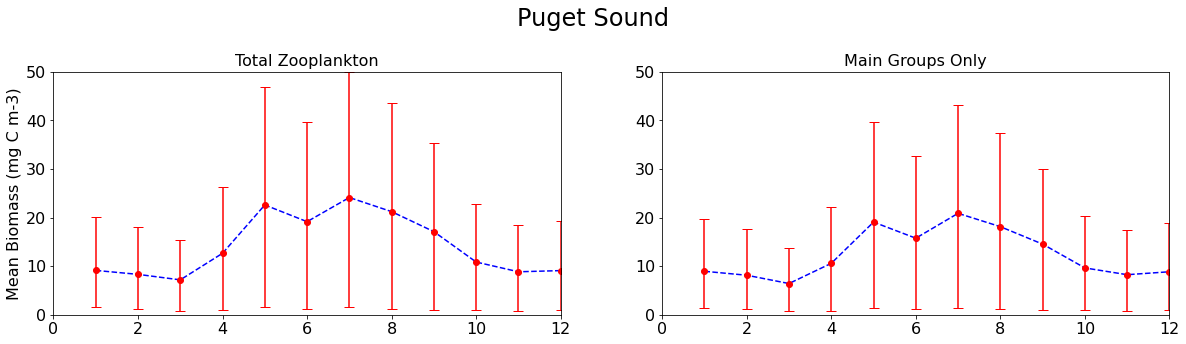

In [541]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
fig.suptitle('Puget Sound', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymean.index,logt_inv(monthlymean['L10Total']),
               yerr=logt_inv(np.array([monthlymean['L10Total']-monthlysem['L10Total'],
                 monthlymean['L10Total']+monthlysem['L10Total']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymean['L10Total']),'b--')
ax[1].errorbar(monthlymean.index,logt_inv(monthlymean['L10MainGroups']),
               yerr=logt_inv(np.array([monthlymean['L10MainGroups']-monthlysem['L10MainGroups'],
                 monthlymean['L10MainGroups']+monthlysem['L10MainGroups']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymean['L10MainGroups']),'b--')

ax[0].set_title('Total Zooplankton')
ax[1].set_title('Main Groups Only')
ax[0].set_ylabel('Mean Biomass (mg C m-3)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)

ax[0].set_ylim(0,50)
ax[1].set_ylim(0,50)



Text(0, 0.5, 'Biomass (mg C m-3)')

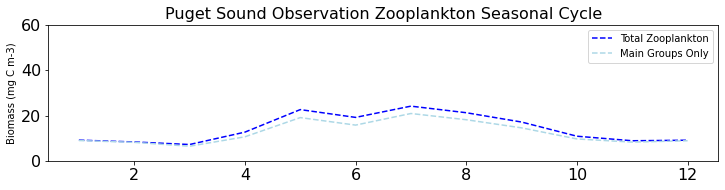

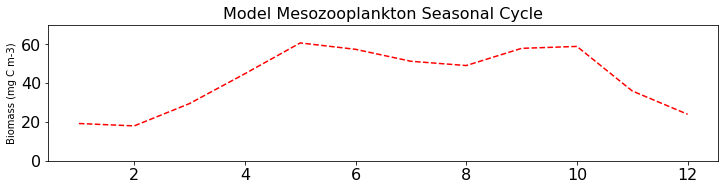

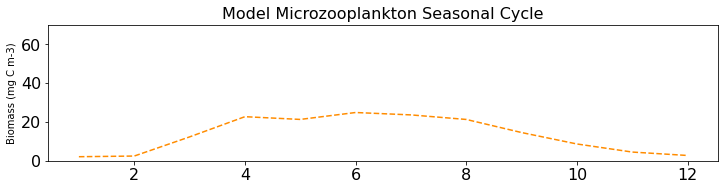

In [557]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))

ax.plot(logt_inv(monthlymean['L10Total']),'b--',label='Total Zooplankton')
ax.plot(logt_inv(monthlymean['L10MainGroups']),'--',color='lightblue',label='Main Groups Only')
ax.set_ylim(0,60)
ax.set_title('Puget Sound Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,70)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,70)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)



Text(0, 0.5, 'Biomass (mg C m-3)')

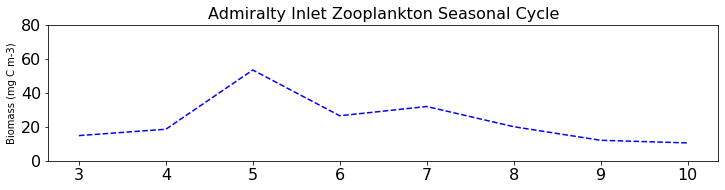

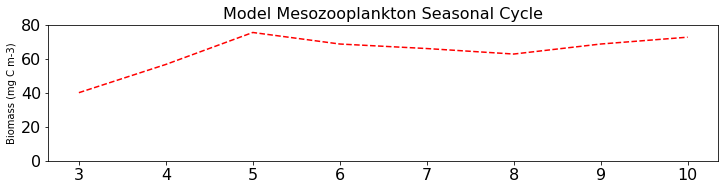

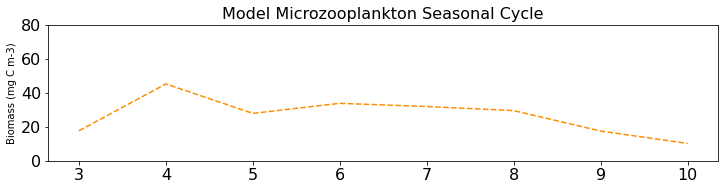

In [546]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))


ax.plot(logt_inv(monthlymeanAdmiralty['L10Total']),'b--')
ax.set_ylim(0,80)
ax.set_title('Admiralty Inlet Zooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)
#ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanAdmiralty['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanAdmiralty['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Biomass (mg C m-3)')

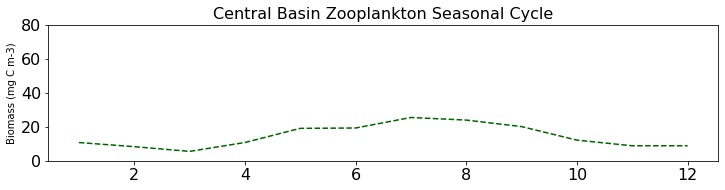

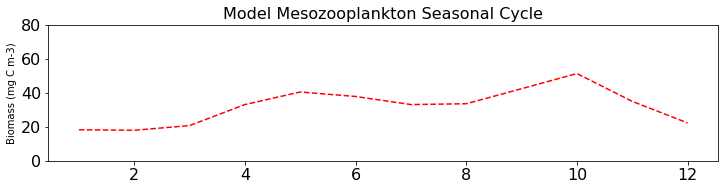

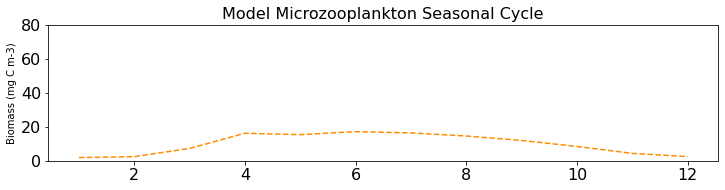

In [554]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))


ax.plot(logt_inv(monthlymeanCentral['L10Total']),'--',color='darkgreen')
ax.set_ylim(0,80)
ax.set_title('Central Basin Zooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)
#ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanCentral['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanCentral['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)


Text(0, 0.5, 'Biomass (mg C m-3)')

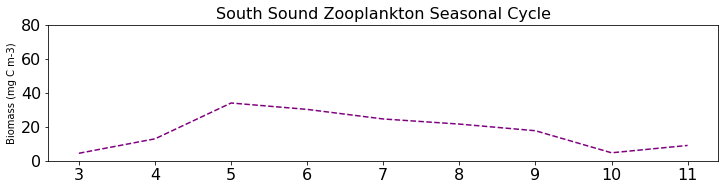

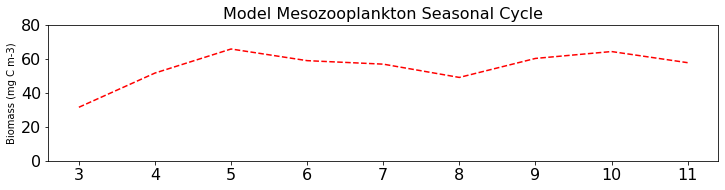

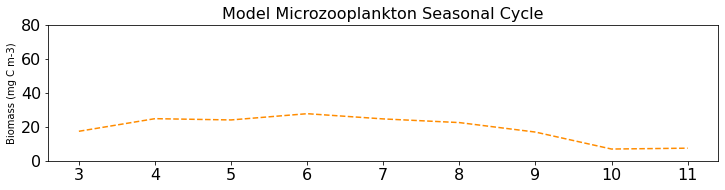

In [556]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))


ax.plot(logt_inv(monthlymeanSouth['L10Total']),'--',color='purple')
ax.set_ylim(0,80)
ax.set_title('South Sound Zooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)
#ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouth['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouth['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Biomass (mg C m-3)',fontsize=10)

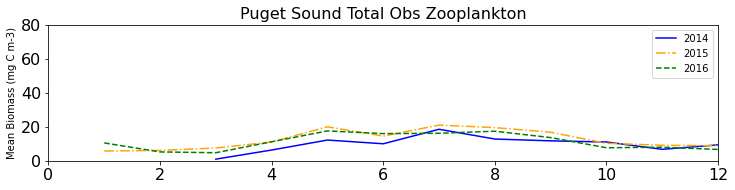

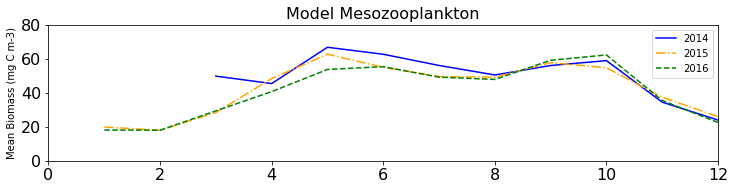

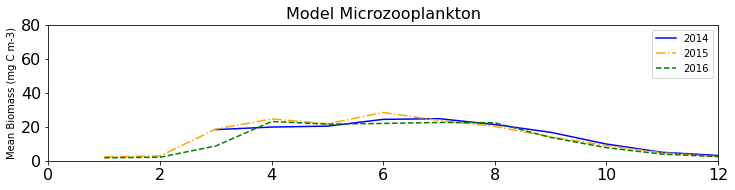

In [550]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(10**(LogTotal2014['L10Total']),'-',color='blue',label='2014')
ax.plot(10**(LogTotal2015['L10Total']),'-.',color='orange',label='2015')
ax.plot(10**(LogTotal2016['L10Total']),'--',color='green',label='2016')
ax.set_ylim(0,80)
ax.set_xlim(0,12)
ax.set_title('Puget Sound Total Obs Zooplankton')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)


fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(10**(LogTotal2014['L10mod_mesozooplankton']),'-',color='blue',label='2014')
ax.plot(10**(LogTotal2015['L10mod_mesozooplankton']),'-.',color='orange',label='2015')
ax.plot(10**(LogTotal2016['L10mod_mesozooplankton']),'--',color='green',label='2016')
ax.set_ylim(0,80)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(10**(LogTotal2014['L10mod_microzooplankton']),'-',color='blue',label='2014')
ax.plot(10**(LogTotal2015['L10mod_microzooplankton']),'-.',color='orange',label='2015')
ax.plot(10**(LogTotal2016['L10mod_microzooplankton']),'--',color='green',label='2016')
ax.set_ylim(0,80)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

In [281]:
cm1=cmocean.cm.thermal
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

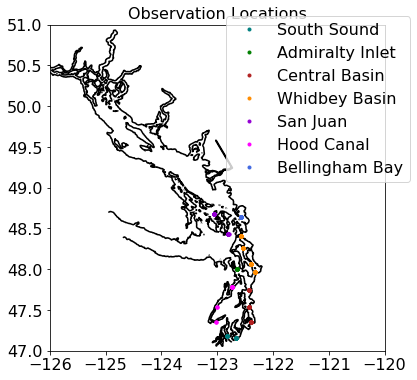

In [282]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('teal','green','firebrick','darkorange','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue')
datreg=dict()
for ind, iregion in enumerate(data.Basin.unique()):
    datreg[iregion] = data.loc[data.Basin==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -120);
ax.set_title('Observation Locations');
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [558]:
def byRegion(ax,obsvar,modvar,lims):
    PS=[]
    for ind, iregion in enumerate(data.Basin.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        PS0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        PS.append(PS0)
    l=ax.legend(handles=[ip[0][0] for ip in PS])
    ax.set_xlabel('Obs')
    ax.set_ylabel('Model')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return PS,l

In [559]:
data['Month']=[ii.month for ii in data['dtUTC']]
JF=data.loc[(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SOND=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)|(data.Month==12)]

In [560]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
        axi.set_ylabel('Model')
    PS=et.varvarPlot(ax[0],JF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    PS=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    PS=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    PS=et.varvarPlot(ax[3],SOND,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

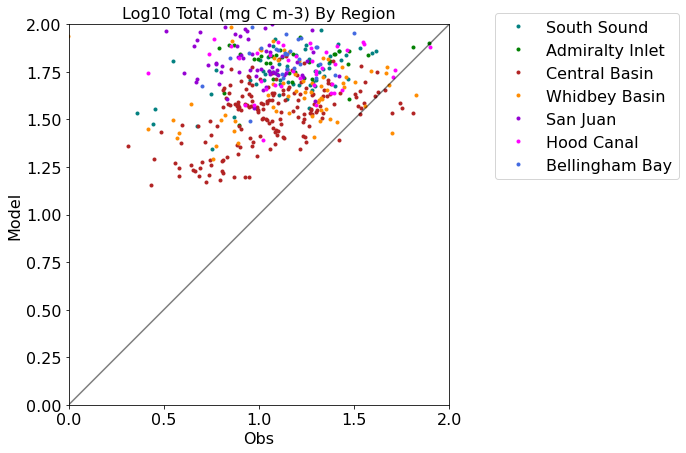

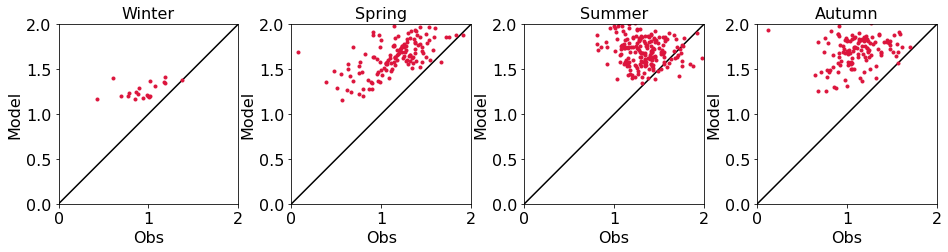

In [566]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
PS,l=byRegion(ax,'L10Total','L10mod_mesozooplankton',(0,2))
ax.set_title('Log10 Total (mg C m-3) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10Total','L10mod_mesozooplankton',(0,2))

